Learning Trigonometric Functions
============================

In [1]:
%matplotlib notebook

from math import sin, cos, tan, pi
from pyautospec import FunctionWfa

Sine function
-------------------

We use spectral learning to learn the `sin` function including words of maximum lenght **2** when calculating the Hankel matrix

In [2]:
# learn the sin function in the [0,2π] interval
sin_a = FunctionWfa(sin, x0=0.0, x1=2*pi, learn_resolution=2)

sin_a

  0%|          | 0/7 [00:00<?, ?it/s]

WFA(states=4) <built-in function sin>: [0.00,6.28] → R

note that `sin_a` automaton is very compact: it contains just **4 states**

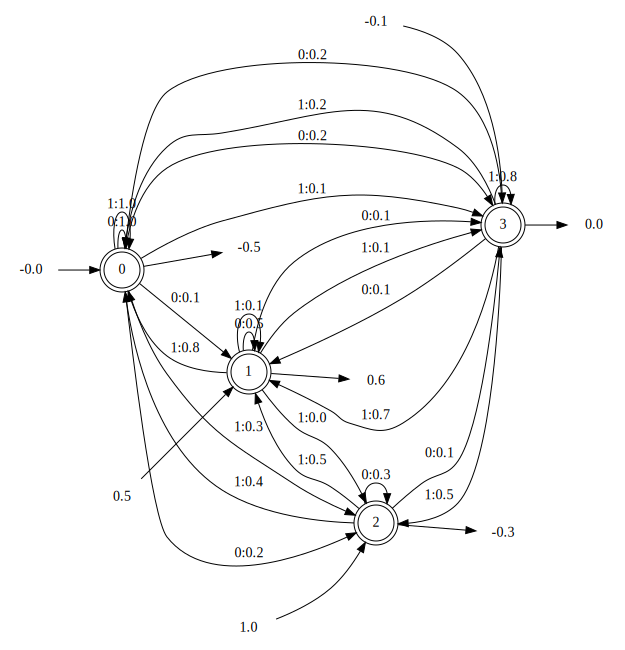

In [3]:
sin_a.model.diagram()

it is not very accurate though

<IPython.core.display.Javascript object>


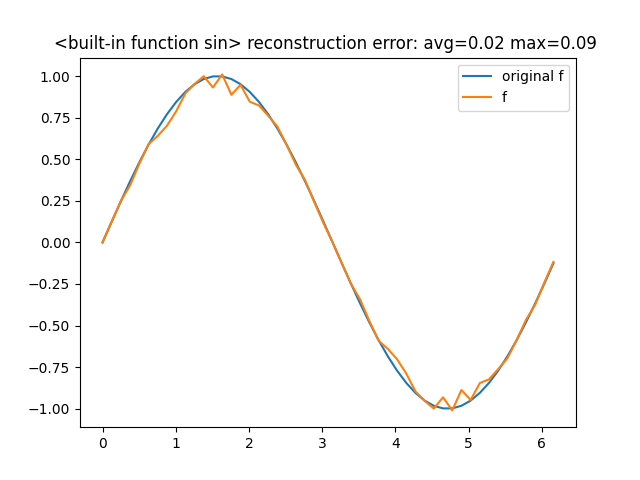

In [4]:
sin_a.comparison_chart()

but we can improve things by **enlarging** the word set used for constructing the Hankel matrix

In [5]:
sin_a = FunctionWfa(sin, x0=0.0, x1=2*pi, learn_resolution=3)

sin_a

  0%|          | 0/15 [00:00<?, ?it/s]

WFA(states=6) <built-in function sin>: [0.00,6.28] → R

now the resulting WFA has **6 states**

<IPython.core.display.Javascript object>


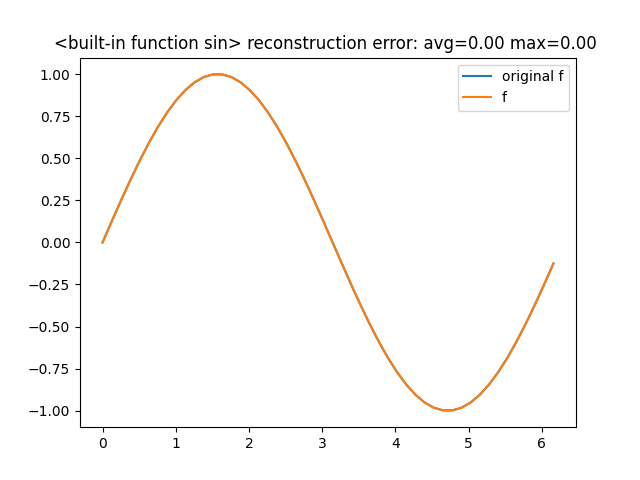

In [6]:
sin_a.comparison_chart()

much better!

The cosine function
----------------------------

In [7]:
# learn the cos function in the [0,2π] interval
cos_a = FunctionWfa(cos, x0=0.0, x1=2*pi, learn_resolution=3)

cos_a

  0%|          | 0/15 [00:00<?, ?it/s]

WFA(states=6) <built-in function cos>: [0.00,6.28] → R

<IPython.core.display.Javascript object>


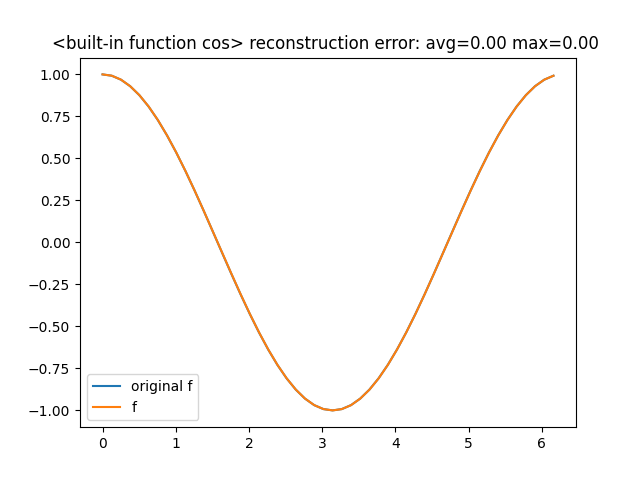

In [8]:
cos_a.comparison_chart()

The tangent function
------------------------------

To learn the `tan` function we need to stay away from the poles and use a larger state set

In [9]:
# learn the tan function in the (-π/2,+π/2) interval
d = 0.05
tan_a = FunctionWfa(tan, x0=-pi/2+d, x1=pi/2-d, learn_resolution=5)

tan_a

  0%|          | 0/63 [00:00<?, ?it/s]

WFA(states=11) <built-in function tan>: [-1.52,1.52] → R

it has many more states than `sin` and `cos`

<IPython.core.display.Javascript object>


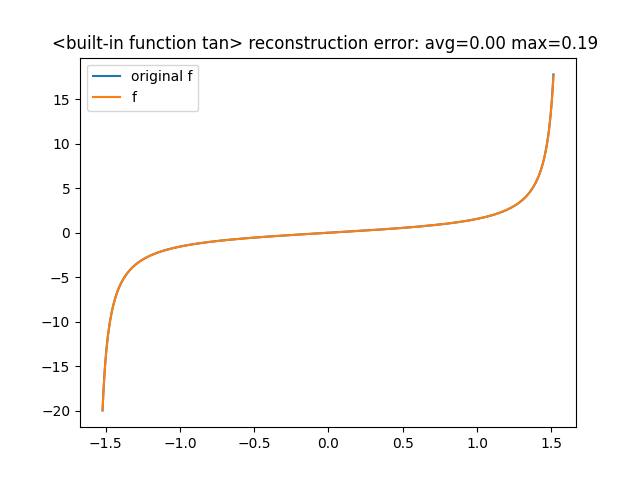

In [10]:
tan_a.comparison_chart(n_points=500)

it reproduces the original function pretty well.

Rapidly Varying
-----------------------

Let's try a more challenging example

In [11]:
def f(x):
    return cos(7*x)*sin(2*x*x - x)
    
f_a = FunctionWfa(f, x0=0, x1=2*pi, learn_resolution=5)

f_a

  0%|          | 0/63 [00:00<?, ?it/s]

WFA(states=19) <function f at 0x69b2a445ecb0>: [0.00,6.28] → R

<IPython.core.display.Javascript object>


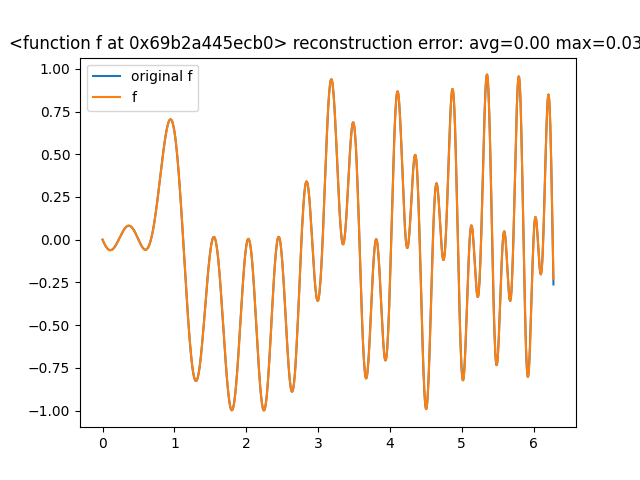

In [12]:
f_a.comparison_chart(n_points=1000)

as expected the WFA has more states, trying different values for `learn_resolution` we get smaller less accurate models